In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**LOAD DATA**

In [2]:
# each patient ID contains multiple data instances, coming from different biomarker measurements across time
data = pd.read_csv('data.csv')
data

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,NaN,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,NaN,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2020-01-31 01:59:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN
6,NaN,2020-01-31 02:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.09,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2020-01-31 06:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2020-02-04 19:42:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2020-02-06 09:14:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,140.0,NaN,...,32.1,NaN,NaN,NaN,NaN,0.23,NaN,NaN,NaN,NaN


**MISSING VALUES**

In [3]:
# collapse all measurements across time into single medians
# fill NaN patient IDs and group by patient id to obtain medians for all cols
data['PATIENT_ID'] = data['PATIENT_ID'].fillna(method='ffill')
data = data.groupby(['PATIENT_ID']).median()

In [4]:
data.head()

,age,gender,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
1.0,73,1,0,19.9,131.0,100.00,13.9,0.09,0.60,NaN,...,32.10,38.40,3.60,0.09,140.00,0.160,41.0,29.0,72.70,90.0
2.0,61,1,0,1.9,148.5,99.25,13.3,0.09,0.05,796.5,...,32.05,39.15,27.40,NaN,137.80,0.300,40.0,28.0,92.85,77.5
3.0,70,2,0,NaN,112.0,102.20,13.6,0.06,0.10,591.0,...,31.10,34.80,22.95,0.10,140.40,0.230,47.5,67.0,84.60,64.0
4.0,74,1,0,4.8,99.0,101.95,16.3,0.38,2.20,NaN,...,41.75,NaN,61.35,0.11,141.05,0.195,72.0,23.0,78.10,84.5
5.0,29,2,0,5.6,130.0,100.95,14.6,0.02,3.00,258.0,...,29.90,NaN,3.90,0.08,141.90,0.360,13.0,15.0,121.40,56.0


In [5]:
# eliminate columns that have NaN for more than 10% (75/375) patients
na = data.isna().sum()>37.5
bad_cols = na[na==True].index
data = data.drop(list(bad_cols),axis=1)

# eliminate rows that have NaN for more than 8.9% (5/56) columns
na = data.isna().sum(axis=1)>5
bad_rows = na[na==True].index
data = data.drop(list(bad_rows),axis=0)

In [6]:
data.head()

,age,gender,outcome,hemoglobin,Serum chloride,Prothrombin time,eosinophils(%),Alkaline phosphatase,albumin,basophil(%),...,?-glutamyl transpeptidase,International standard ratio,basophil count(#),mean corpuscular hemoglobin,Hypersensitive c-reactive protein,serum sodium,thrombocytocrit,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
1.0,73,1,0,131.0,100.00,13.9,0.60,57.0,33.30,0.20,...,31.0,1.060,0.010,32.10,3.60,140.00,0.160,29.0,72.70,90.0
2.0,61,1,0,148.5,99.25,13.3,0.05,44.0,36.20,0.15,...,46.5,1.005,0.015,32.05,27.40,137.80,0.300,28.0,92.85,77.5
3.0,70,2,0,112.0,102.20,13.6,0.10,61.0,34.90,0.10,...,53.0,1.040,0.010,31.10,22.95,140.40,0.230,67.0,84.60,64.0
4.0,74,1,0,99.0,101.95,16.3,2.20,72.5,34.00,0.25,...,14.5,1.290,0.015,41.75,61.35,141.05,0.195,23.0,78.10,84.5
5.0,29,2,0,130.0,100.95,14.6,3.00,81.0,39.85,0.30,...,20.0,1.130,0.020,29.90,3.90,141.90,0.360,15.0,121.40,56.0


In [7]:
data.describe()

,age,gender,outcome,hemoglobin,Serum chloride,Prothrombin time,eosinophils(%),Alkaline phosphatase,albumin,basophil(%),...,?-glutamyl transpeptidase,International standard ratio,basophil count(#),mean corpuscular hemoglobin,Hypersensitive c-reactive protein,serum sodium,thrombocytocrit,glutamic-pyruvic transaminase,eGFR,creatinine
count,353.000000,353.000000,353.000000,353.000000,352.000000,348.000000,353.000000,353.000000,353.000000,353.000000,...,353.000000,348.000000,353.000000,353.000000,350.000000,352.000000,344.000000,353.000000,353.000000,353.000000
mean,58.821530,1.416431,0.456091,126.329603,102.568750,15.589799,0.643909,81.308782,33.137960,0.215581,...,49.671388,1.210287,0.016728,30.872096,68.412000,140.883239,0.212122,38.958924,84.886969,101.800283
std,16.469303,0.493666,0.498775,18.017240,6.879152,6.215567,0.983080,48.298414,5.484888,0.183164,...,62.675388,0.367039,0.013148,2.748128,71.025121,6.399807,0.085509,94.154094,29.881835,132.177708
min,18.000000,1.000000,0.000000,57.000000,74.600000,11.500000,0.000000,17.000000,18.550000,0.000000,...,7.000000,0.840000,0.000000,20.800000,0.100000,119.100000,0.010000,5.000000,2.150000,12.500000
25%,46.000000,1.000000,0.000000,115.000000,99.100000,13.487500,0.000000,54.000000,29.400000,0.100000,...,21.000000,1.030000,0.010000,29.700000,7.225000,138.000000,0.150000,17.000000,69.400000,58.000000
50%,62.000000,1.000000,0.000000,126.500000,101.825000,14.250000,0.100000,69.000000,33.150000,0.200000,...,32.000000,1.090000,0.010000,30.850000,47.200000,140.025000,0.210000,23.000000,90.800000,74.000000
75%,70.000000,2.000000,1.000000,138.500000,104.612500,16.000000,0.950000,91.500000,37.000000,0.300000,...,52.500000,1.270000,0.020000,32.050000,112.112500,142.562500,0.260000,38.000000,105.300000,93.000000
max,95.000000,2.000000,1.000000,178.000000,140.200000,112.400000,5.550000,620.000000,47.600000,1.700000,...,732.000000,4.690000,0.100000,50.800000,320.000000,179.600000,0.510000,1508.000000,215.450000,1430.000000


In [8]:
# fill in missing values with column median
data = data.apply(lambda x: x.fillna(x.median()),axis=0)
data.isna().sum().sum() # no more missing values

0

In [9]:
# All columns are already numeric, so no need for one-hot encoding
len(data._get_numeric_data().columns)

55

**RANDOM FOREST TRAINING AND EVALUATION**

In [10]:
# data and label sets
labels = data['outcome']
features = data.drop(['outcome'],axis=1)

In [11]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (264, 54)
Training Labels Shape: (264,)
Testing Features Shape: (89, 54)
Testing Labels Shape: (89,)


In [13]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [14]:
preds = rf.predict(test_features)
errors = abs(preds-test_labels)
print('Mean absolute error:', np.mean(errors)) #mean absolute error

preds_01 = (preds>0.5).astype(float) #binary classification
acc = np.sum(preds_01 == test_labels)/len(test_labels)
print('Accuracy',acc)

Mean absolute error: 0.07270786516853933
Accuracy 1.0


**FEATURE IMPORTANCE**

The model accurately predicts for which patients the virus will be deadly. According to the model, the most important features indicating mortality risk are: Lactate dehydrogenase, neutrophils(%) and (%)lymphocyte.

In [15]:
feature_list = features.columns

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the features and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Lactate dehydrogenase Importance: 0.54
Variable: neutrophils(%)       Importance: 0.12
Variable: (%)lymphocyte        Importance: 0.1
Variable: Hypersensitive c-reactive protein Importance: 0.08
Variable: age                  Importance: 0.01
Variable: Prothrombin time     Importance: 0.01
Variable: albumin              Importance: 0.01
Variable: Platelet count       Importance: 0.01
Variable: Prothrombin activity Importance: 0.01
Variable: lymphocyte count     Importance: 0.01
Variable: glucose              Importance: 0.01
Variable: D-D dimer            Importance: 0.01
Variable: International standard ratio Importance: 0.01
Variable: serum sodium         Importance: 0.01
Variable: thrombocytocrit      Importance: 0.01
Variable: gender               Importance: 0.0
Variable: hemoglobin           Importance: 0.0
Variable: Serum chloride       Importance: 0.0
Variable: eosinophils(%)       Importance: 0.0
Variable: Alkaline phosphatase Importance: 0.0
Variable: basophil(%)   

**VISUALIZATION**

Bar plots of the 3 most important features which discriminate between survived and deceased patients

Text(0, 0.5, 'LDH percentage')

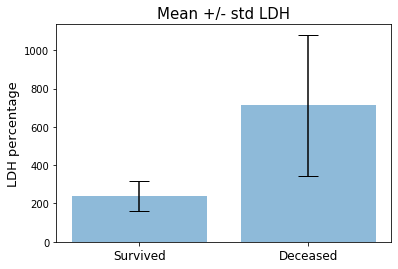

In [16]:
# Lactate dehydrogenase
ldh_means = [data[data['outcome']==0]['Lactate dehydrogenase'].mean(), data[data['outcome']==1]['Lactate dehydrogenase'].mean()]
ldh_std = [data[data['outcome']==0]['Lactate dehydrogenase'].std(), data[data['outcome']==1]['Lactate dehydrogenase'].std()]

fig, ax = plt.subplots()
ax.bar(np.arange(2),ldh_means,yerr=ldh_std,alpha=0.5,align='center',capsize=10)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Survived','Deceased'],fontsize=12)
ax.set_title('Mean +/- std LDH',fontsize=15)
ax.set_ylabel('LDH percentage',fontsize=13)

Text(0, 0.5, 'Neutrophils percentage')

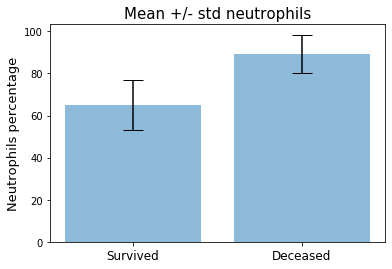

In [17]:
# Neutrophils
neutr_means = [data[data['outcome']==0]['neutrophils(%)'].mean(), data[data['outcome']==1]['neutrophils(%)'].mean()]
neutr_std = [data[data['outcome']==0]['neutrophils(%)'].std(), data[data['outcome']==1]['neutrophils(%)'].std()]

fig, ax = plt.subplots()
ax.bar(np.arange(2),neutr_means,yerr=neutr_std,alpha=0.5,align='center',capsize=10)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Survived','Deceased'],fontsize=12)
ax.set_title('Mean +/- std neutrophils',fontsize=15)
ax.set_ylabel('Neutrophils percentage',fontsize=13)

Text(0, 0.5, 'Lymphocytes percentage')

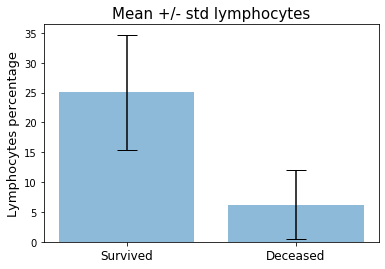

In [18]:
# Lymphocytes
lymph_means = [data[data['outcome']==0]['(%)lymphocyte'].mean(), data[data['outcome']==1]['(%)lymphocyte'].mean()]
lymph_std = [data[data['outcome']==0]['(%)lymphocyte'].std(), data[data['outcome']==1]['(%)lymphocyte'].std()]

fig, ax = plt.subplots()
ax.bar(np.arange(2),lymph_means,yerr=lymph_std,alpha=0.5,align='center',capsize=10)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Survived','Deceased'],fontsize=12)
ax.set_title('Mean +/- std lymphocytes',fontsize=15)
ax.set_ylabel('Lymphocytes percentage',fontsize=13)